In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('./training.csv')

In [4]:
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [5]:
def preprocess_data(df):
    # Remove package name as it's not relevant
    df = df.drop('package_name', axis=1)
    
    # Convert text to lowercase
    df['review'] = df['review'].str.strip().str.lower()
    return df

In [6]:
df = preprocess_data(df)

In [7]:
# Split into training and testing data
x = df['review']
y = df['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [8]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [18]:
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report 
model = MultinomialNB() 
print(model.fit(x, y)) 
print(model.score(x_test, y_test)) 
p=model.score(x_test, y_test) 
print(model.predict(vec.transform(['I love this app !!!']))) 
pred = model.predict(x_test) 

MultinomialNB()
0.8565022421524664
[1]


In [20]:
print(accuracy_score(y_test,pred)) 
print(confusion_matrix(y_test,pred)) 
print(classification_report(y_test,pred))

0.8565022421524664
[[140   6]
 [ 26  51]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       146
           1       0.89      0.66      0.76        77

    accuracy                           0.86       223
   macro avg       0.87      0.81      0.83       223
weighted avg       0.86      0.86      0.85       223



In [22]:
# Save model
joblib.dump(model, './model.pkl')
xgb = XGBClassifier(max_depth=10, n_estimators=400, learning_rate=0.3, objective='binary:logistic') 
xgb.fit(x, y) 
q=xgb.score(x_test, y_test) 
pred = xgb.predict(x_test) 
print(accuracy_score(y_test,pred)) 
print(confusion_matrix(y_test,pred)) 
print(classification_report(y_test,pred)) 
dt = DecisionTreeClassifier() 
dt.fit(x, y) 
r=dt.score(x_test, y_test) 
pred = dt.predict(x_test)  
print(accuracy_score(y_test,pred)) 
print(confusion_matrix(y_test,pred)) 
print(classification_report(y_test,pred)) 

0.8071748878923767
[[133  13]
 [ 30  47]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       146
           1       0.78      0.61      0.69        77

    accuracy                           0.81       223
   macro avg       0.80      0.76      0.77       223
weighted avg       0.80      0.81      0.80       223

0.7354260089686099
[[119  27]
 [ 32  45]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       146
           1       0.62      0.58      0.60        77

    accuracy                           0.74       223
   macro avg       0.71      0.70      0.70       223
weighted avg       0.73      0.74      0.73       223



<BarContainer object of 3 artists>

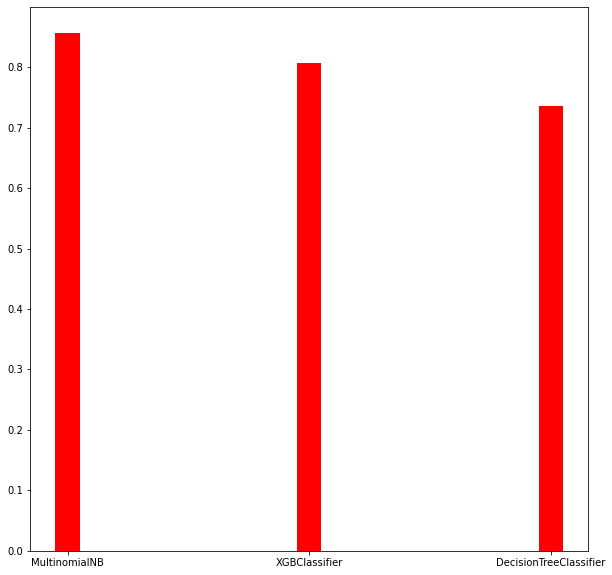

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt 
# creating the dataset 
data = {'MultinomialNB':p, 'XGBClassifier':q, 'DecisionTreeClassifier':r} 
courses = list(data.keys()) 
values = list(data.values())
fig = plt.figure(figsize = (10,10))
plt.bar(courses,values,color='red', width=0.1)